In [12]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from torch.autograd import Variable
%matplotlib inline

In [2]:
x = Variable(torch.Tensor([2]), requires_grad=True)
y = x ** 2
y.backward()
print(x.grad)

Variable containing:
 4
[torch.FloatTensor of size 1]



In [6]:
x = Variable(torch.Tensor([2]), requires_grad=True)
y = torch.exp(x)
y.backward()
print(x.grad)

Variable containing:
 7.3891
[torch.FloatTensor of size 1]



In [7]:
x = Variable(torch.Tensor([1]), requires_grad=True)
y = Variable(torch.Tensor([2]), requires_grad=True)
z = (x + 2 * y) ** 2
z.backward()
print(x.grad)  # dz/dx
print(y.grad)  # dz/dy

Variable containing:
 10
[torch.FloatTensor of size 1]

Variable containing:
 20
[torch.FloatTensor of size 1]



In [8]:
# バッチサンプル数=5、入力特徴量の次元数=3
x = Variable(torch.randn(5, 3))
# バッチサンプル数=5、出力特徴量の次元数=2
y = Variable(torch.randn(5, 2))

# Linear層を作成
# 3ユニット => 2ユニット
linear = nn.Linear(3, 2)

# Linear層のパラメータ
print('w:', linear.weight)
print('b:', linear.bias)

# lossとoptimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(linear.parameters(), lr=0.01)

# forward
pred = linear(x)

# loss = L
loss = criterion(pred, y)
print('loss:', loss)

# backpropagation
loss.backward()

# 勾配を表示
print('dL/dw:', linear.weight.grad)
print('dL/db:', linear.bias.grad)

# 勾配を用いてパラメータを更新
print('*** by hand')
print(linear.weight.sub(0.01 * linear.weight.grad))
print(linear.bias.sub(0.01 * linear.bias.grad))

# 勾配降下法
optimizer.step()

# 1ステップ更新後のパラメータを表示
# 上の式と結果が一致することがわかる
print('*** by optimizer.step()')
print(linear.weight)
print(linear.bias)

w: Parameter containing:
-0.5292 -0.0167 -0.2479
 0.2931 -0.4432 -0.1612
[torch.FloatTensor of size 2x3]

b: Parameter containing:
 0.4264
-0.3408
[torch.FloatTensor of size 2]

loss: Variable containing:
 0.6476
[torch.FloatTensor of size 1]

dL/dw: Variable containing:
-0.1689  0.4533 -0.9575
-0.1298  0.3287 -0.2439
[torch.FloatTensor of size 2x3]

dL/db: Variable containing:
-0.2798
-0.1811
[torch.FloatTensor of size 2]

*** by hand
Variable containing:
-0.5275 -0.0212 -0.2383
 0.2944 -0.4465 -0.1587
[torch.FloatTensor of size 2x3]

Variable containing:
 0.4292
-0.3390
[torch.FloatTensor of size 2]

*** by optimizer.step()
Parameter containing:
-0.5275 -0.0212 -0.2383
 0.2944 -0.4465 -0.1587
[torch.FloatTensor of size 2x3]

Parameter containing:
 0.4292
-0.3390
[torch.FloatTensor of size 2]



In [10]:

# hyper parameters
input_size = 1
output_size = 1
num_epochs = 60
learning_rate = 0.001

In [11]:
# toy dataset
# 15 samples, 1 features
x_train = np.array([3.3, 4.4, 5.5, 6.71, 6.93, 4.168, 9.779, 6.182, 7.59,
                    2.167, 7.042, 10.791, 5.313, 7.997, 3.1],
                   dtype=np.float32)

y_train = np.array([1.7, 2.76, 2.09, 3.19, 1.694, 1.573, 3.366, 2.596, 2.53,
                    1.221, 2.827, 3.465, 1.65, 2.904, 1.3],
                   dtype=np.float32)

x_train = x_train.reshape(15, 1)
y_train = y_train.reshape(15, 1)

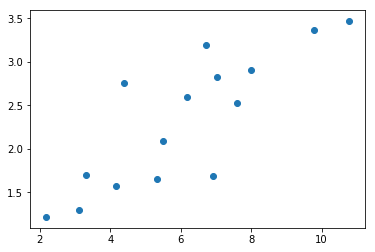

In [25]:
plt.scatter(x_train[:, 0], y_train[:, 0])
plt.show()

In [26]:
class LinearRegression(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
        
    def forward(self, x):
        out = self.linear(x)
        return out
    
model = LinearRegression(input_size, output_size)

In [27]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [29]:
for epoch in range(num_epochs):
    inputs = Variable(torch.from_numpy(x_train))
    targets = Variable(torch.from_numpy(y_train))
    
    optimizer.zero_grad()
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 10 == 0:
        print('Epoch [%d/%d], Loss: %.4f' % (epoch + 1, num_epochs, loss.data[0]))
        
torch.save(model.state_dict(), 'model.pkl')

Epoch [10/60], Loss: 1.1475
Epoch [20/60], Loss: 0.4909
Epoch [30/60], Loss: 0.3823
Epoch [40/60], Loss: 0.3637
Epoch [50/60], Loss: 0.3598
Epoch [60/60], Loss: 0.3584


In [30]:
predict = model(Variable(torch.from_numpy(x_train))).data.numpy()

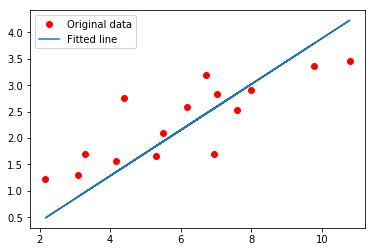

In [32]:
plt.plot(x_train, y_train, 'ro', label='Original data')
plt.plot(x_train, predict, label='Fitted line')
plt.legend()
plt.show()